In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\cifer-10-img\\train"
test_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\cifer-10-img\\test"

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32,32),
    batch_size=train_batch_size,
    class_mode='categorical',
    shuffle=True
)

test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32,32),
    batch_size=test_batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [5]:
xtrain,ytrain = train_generator[0]
xtest,ytest = test_generator[0]
print(len(xtrain),len(xtest))

5000 1000


In [6]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path,include_top=False,input_shape=(32,32,3))

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
x = Flatten()(base_model.output)
x = Dense(256,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(10,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=predictions)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(xtrain,ytrain,batch_size=64,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
79/79 [==============================] - 14s 163ms/step - loss: 1.9889 - accuracy: 0.2820 - val_loss: 1.6243 - val_accuracy: 0.4260
Epoch 2/10
79/79 [==============================] - 14s 172ms/step - loss: 1.5820 - accuracy: 0.4388 - val_loss: 1.4554 - val_accuracy: 0.4870
Epoch 3/10
79/79 [==============================] - 16s 204ms/step - loss: 1.4493 - accuracy: 0.4862 - val_loss: 1.3993 - val_accuracy: 0.5120
Epoch 4/10
79/79 [==============================] - 16s 203ms/step - loss: 1.3488 - accuracy: 0.5236 - val_loss: 1.3591 - val_accuracy: 0.5250
Epoch 5/10
79/79 [==============================] - 16s 203ms/step - loss: 1.2754 - accuracy: 0.5498 - val_loss: 1.2970 - val_accuracy: 0.5460
Epoch 6/10
79/79 [==============================] - 16s 204ms/step - loss: 1.2267 - accuracy: 0.5708 - val_loss: 1.3224 - val_accuracy: 0.5490
Epoch 7/10
79/79 [==============================] - 16s 205ms/step - loss: 1.1577 - accuracy: 0.6006 - val_loss: 1.3153 - val_accuracy: 0.5470

In [15]:
base_model = VGG16(weights=weights_path,include_top=False,input_shape=(32,32,3))

for layer in base_model.layers:
    layer.trainable= False

for layer in base_model.layers[len(base_model.layers) - 4:]:
    layer.trainable = True
    
x = Flatten()(base_model.output)
x = Dense(256,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(10,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=predictions)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=64,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
79/79 [==============================] - 48s 595ms/step - loss: 2.0613 - accuracy: 0.1990 - val_loss: 1.8112 - val_accuracy: 0.2820
Epoch 2/10
79/79 [==============================] - 48s 609ms/step - loss: 1.5567 - accuracy: 0.4220 - val_loss: 1.3711 - val_accuracy: 0.5080
Epoch 3/10
79/79 [==============================] - 49s 624ms/step - loss: 1.2156 - accuracy: 0.5784 - val_loss: 1.1759 - val_accuracy: 0.5830
Epoch 4/10
79/79 [==============================] - 47s 592ms/step - loss: 0.9929 - accuracy: 0.6640 - val_loss: 1.1424 - val_accuracy: 0.6330
Epoch 5/10
79/79 [==============================] - 49s 615ms/step - loss: 0.8470 - accuracy: 0.7140 - val_loss: 1.1874 - val_accuracy: 0.6260
Epoch 6/10
79/79 [==============================] - 48s 613ms/step - loss: 0.7153 - accuracy: 0.7630 - val_loss: 1.1229 - val_accuracy: 0.6590
Epoch 7/10
79/79 [==============================] - 48s 608ms/step - loss: 0.6244 - accuracy: 0.7970 - val_loss: 1.3313 - val_accuracy: 0.6340

In [16]:
predicted_value = model.predict(xtest)

32/32 [==============================] - 3s 95ms/step


In [17]:
labels = list(test_generator.class_indices.keys())

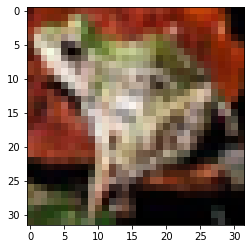

Predicted: frog
Actual: frog


In [18]:
n = 32
plt.imshow(xtest[n])
plt.show()
print("Predicted:",labels[np.argmax(predicted_value[n])])
print("Actual:",labels[np.argmax(ytest[n])])